# 🎯 PCA Visualization of Influencer Clusters
This notebook visualizes the result of KMeans clustering from the fake influencer detection project using PCA (Principal Component Analysis).

- Input: `clustered_influencers.csv`
- Output: 2D scatter plot of influencers colored by cluster


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load clustered data
df = pd.read_csv('../results/clustered_influencers.csv')
df.head()


,segment,followers_count,avg_likes,avg_comments,posts_per_week,engagement_rate,cluster
0,micro,8270,357,10,5,4.437727,4
1,micro,1860,466,19,8,26.075269,2
2,micro,6390,473,26,6,7.809077,4
3,micro,6191,177,15,8,3.101276,0
4,micro,6734,88,9,6,1.440451,4


In [3]:
# Select numeric columns (except cluster and segment)
features = ['followers_count', 'avg_likes', 'avg_comments', 'posts_per_week', 'engagement_rate']
X = df[features]

# Re-scaling (because PCA is also scale sensitive)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# add to df
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]


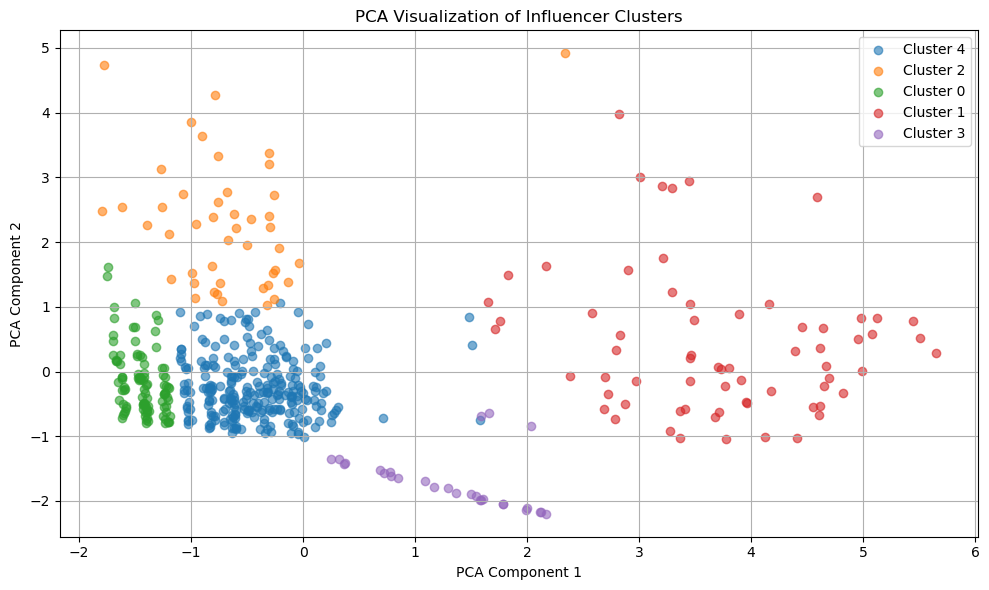

In [5]:
# Visualisasi Cluster for 2D
plt.figure(figsize=(10, 6))

# Loop all cluster
for cluster_id in df['cluster'].unique():
    subset = df[df['cluster'] == cluster_id] #We take a subset (piece) of data specific to a particular cluster.
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster_id}', alpha=0.6)

plt.title('PCA Visualization of Influencer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('../results/cluster_pca_visual.png', dpi=300)

plt.show()


In [6]:
df.to_csv("influencer_cluster_analysis.csv", index=False)
print("✅ File saved: influencer_cluster_analysis.csv")

✅ File saved: influencer_cluster_analysis.csv


C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_11748\2865170575.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_clusters))
C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_11748\2865170575.py:46: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\HP ProBook\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


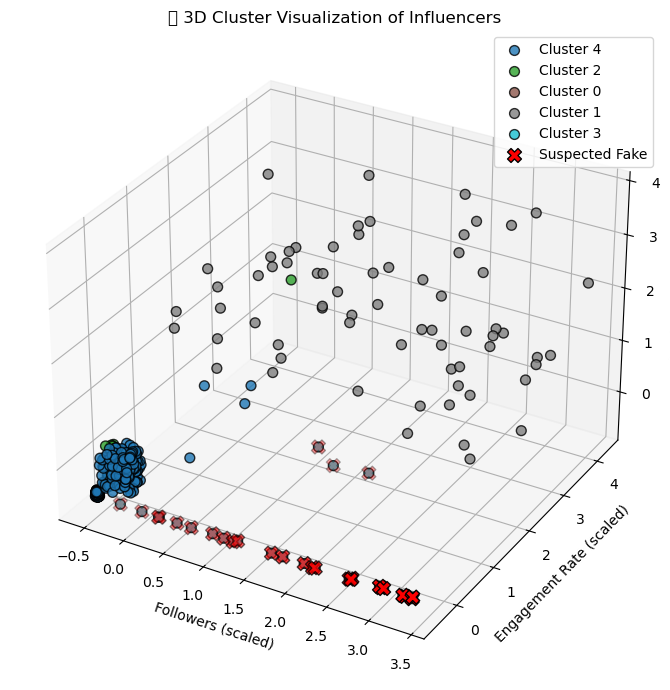

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Asumsikan kamu sudah punya X_scaled dan df['cluster']
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Loop untuk setiap cluster dan warnai berbeda
unique_clusters = df['cluster'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_clusters))

for i, cluster_id in enumerate(unique_clusters):
    mask = df['cluster'] == cluster_id
    ax.scatter(
        X_scaled[mask, 0],  # X: followers
        X_scaled[mask, 1],  # Y: engagement rate
        X_scaled[mask, 2],  # Z: avg_likes (misalnya)
        s=50,
        alpha=0.8,
        c=[colors(i)],
        label=f"Cluster {cluster_id}",
        edgecolors='k'
    )

# Optional: sorot cluster 3 (fake influencer)
fake_mask = df['cluster'] == 3
ax.scatter(
    X_scaled[fake_mask, 0],
    X_scaled[fake_mask, 1],
    X_scaled[fake_mask, 2],
    c='red',
    s=100,
    marker='X',
    label='Suspected Fake',
    edgecolors='black'
)

# Label dan judul
ax.set_xlabel('Followers (scaled)')
ax.set_ylabel('Engagement Rate (scaled)')
ax.set_zlabel('Avg Likes (scaled)')
ax.set_title('🎯 3D Cluster Visualization of Influencers')

ax.legend()
plt.tight_layout()
plt.show()
